In [14]:
import polars as pl
import matplotlib.pyplot as plt

In [4]:
raw_data = pl.read_ipc('data/raw_data.arrow')
raw_data

Date,Minutes,Stock,open,high,low,close,volume,num_trade,last_bid,last_ask,bid_twap,num_lift,lift_vwap,lift_volume,num_hit,vwap,ask_twap,hit_vwap,hit_volume,trade_mask,lift_mask,hit_mask
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32
"""0401""","""09:31:00""","""Stock1""",49.3,49.3,48.85,48.95,157500.0,145.0,48.85,48.95,48.8445,8.0,48.9944,4500.0,14.0,49.2625,48.9646,48.869,10500.0,2,2,2
"""0401""","""09:31:00""","""Stock2""",15.7,15.74,15.5,15.66,132000.0,96.0,15.66,15.76,15.6156,8.0,15.5467,12000.0,29.0,15.6856,15.7031,15.6987,46000.0,2,2,2
"""0401""","""09:31:00""","""Stock3""",80.0,80.4,79.7,79.8,583400.0,806.0,79.8,79.9,79.9315,272.0,80.0055,216700.0,261.0,80.0235,80.0439,80.0602,207900.0,2,2,2
"""0401""","""09:31:00""","""Stock4""",41.1,41.25,41.1,41.15,32000.0,31.0,41.25,41.3,41.2177,2.0,41.1056,4500.0,5.0,41.1133,41.3103,41.2143,3500.0,2,2,1
"""0401""","""09:31:00""","""Stock5""",41.55,41.55,40.9,41.2,19000.0,38.0,41.2,41.5,41.0682,8.0,41.225,4000.0,2.0,41.4632,41.5176,41.2,1000.0,2,1,2
"""0401""","""09:31:00""","""Stock6""",23.05,23.05,22.9,22.95,120000.0,104.0,22.95,23.0,22.9412,33.0,22.9568,47500.0,15.0,23.0098,23.0025,23.0322,22500.0,2,2,2
"""0401""","""09:31:00""","""Stock7""",8.88,8.92,8.81,8.91,4.308e6,522.0,8.91,8.93,8.88493,176.0,8.8848,1.23e6,162.0,8.88472,8.89983,8.88779,1.854e6,2,2,2
"""0401""","""09:31:00""","""Stock8""",20.4,20.6,20.35,20.45,149200.0,113.0,20.45,20.6,20.4288,42.0,20.421,42800.0,43.0,20.4635,20.555,20.4913,94000.0,2,2,2
"""0401""","""09:31:00""","""Stock9""",132.9,133.0,131.9,132.8,27400.0,129.0,132.5,132.8,132.298,29.0,132.434,5000.0,32.0,132.699,132.691,132.531,8600.0,2,2,2


In [7]:
for stock, data in raw_data.groupby('Stock'):
    print(stock)
    print(data.describe())

/var/folders/l6/_r0p26sx1v9g85my00m5jmgm0000gn/T/ipykernel_7984/1118751433.py:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  for stock, data in raw_data.groupby('Stock'):


Stock16
shape: (9, 24)
┌────────────┬───────┬──────────┬─────────┬───┬──────────────┬────────────┬───────────┬──────────┐
│ describe   ┆ Date  ┆ Minutes  ┆ Stock   ┆ … ┆ hit_volume   ┆ trade_mask ┆ lift_mask ┆ hit_mask │
│ ---        ┆ ---   ┆ ---      ┆ ---     ┆   ┆ ---          ┆ ---        ┆ ---       ┆ ---      │
│ str        ┆ str   ┆ str      ┆ str     ┆   ┆ f64          ┆ f64        ┆ f64       ┆ f64      │
╞════════════╪═══════╪══════════╪═════════╪═══╪══════════════╪════════════╪═══════════╪══════════╡
│ count      ┆ 59730 ┆ 59730    ┆ 59730   ┆ … ┆ 59730.0      ┆ 59730.0    ┆ 59730.0   ┆ 59730.0  │
│ null_count ┆ 0     ┆ 0        ┆ 0       ┆ … ┆ 0.0          ┆ 0.0        ┆ 0.0       ┆ 0.0      │
│ mean       ┆ null  ┆ null     ┆ null    ┆ … ┆ 3265.712372  ┆ 0.722937   ┆ 0.478152  ┆ 0.411267 │
│ std        ┆ null  ┆ null     ┆ null    ┆ … ┆ 12986.020968 ┆ 0.788483   ┆ 0.694004  ┆ 0.674084 │
│ min        ┆ 0401  ┆ 09:31:00 ┆ Stock16 ┆ … ┆ 0.0          ┆ 0.0        ┆ 0.0       

In [12]:
fill_data = raw_data.groupby('Stock', maintain_order=True).apply(lambda df: df.select(pl.all().forward_fill()))
fill_data.describe()

/var/folders/l6/_r0p26sx1v9g85my00m5jmgm0000gn/T/ipykernel_7984/3732584517.py:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  fill_data = raw_data.groupby('Stock', maintain_order=True).apply(lambda df: df.select(pl.all().forward_fill()))
/var/folders/l6/_r0p26sx1v9g85my00m5jmgm0000gn/T/ipykernel_7984/3732584517.py:1: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_groups`.
  fill_data = raw_data.groupby('Stock', maintain_order=True).apply(lambda df: df.select(pl.all().forward_fill()))


describe,Date,Minutes,Stock,open,high,low,close,volume,num_trade,last_bid,last_ask,bid_twap,num_lift,lift_vwap,lift_volume,num_hit,vwap,ask_twap,hit_vwap,hit_volume,trade_mask,lift_mask,hit_mask
str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""5973000""","""5973000""","""5973000""",5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6,5.973e6
"""null_count""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"""mean""",null,null,null,44.653544,44.681367,44.625166,44.653628,82417.30818,20.632866,44.622378,44.682414,44.622345,9.671703,44.631021,34943.555773,10.399725,44.652912,44.68275,44.674837,38526.67178,1.512635,1.164003,1.12399
"""std""",null,null,null,59.189468,59.226649,59.151708,59.189464,718519.944102,44.643796,59.165039,59.212055,59.165077,23.618542,59.174233,248644.139898,23.713313,59.188774,59.21245,59.203307,262777.217836,0.726863,0.842544,0.852939
"""min""","""0401""","""09:31:00""","""Stock1""",1.31,1.31,1.31,1.31,0.0,0.0,1.31,1.32,1.31,0.0,1.31,0.0,0.0,1.31,1.32,1.32,0.0,0.0,0.0,0.0
"""25%""",null,null,null,9.26,9.27,9.25,9.26,1600.0,2.0,9.25,9.27,9.25001,0.0,9.25333,0.0,0.0,9.26,9.26842,9.26303,0.0,1.0,0.0,0.0
"""50%""",null,null,null,24.3,24.3,24.25,24.3,10000.0,7.0,24.25,24.3,24.25,2.0,24.25,2400.0,3.0,24.281,24.3,24.3,3000.0,2.0,1.0,1.0
"""75%""",null,null,null,53.25,53.25,53.2,53.25,41500.0,22.0,53.2,53.25,53.2,10.0,53.2,16000.0,11.0,53.2376,53.2593,53.25,17600.0,2.0,2.0,2.0
"""max""","""1209""","""16:00:00""","""Stock99""",416.0,416.6,415.2,416.0,6.16378e8,9705.0,416.0,416.2,415.771,3913.0,416.082,8.5912e7,2684.0,416.115,415.998,416.179,8.0903e7,2.0,2.0,2.0


(array([8.54776e+05, 6.96216e+05, 5.39694e+05, 3.60310e+05, 3.36818e+05,
        3.42645e+05, 2.34940e+05, 1.97722e+05, 2.56585e+05, 2.52900e+05,
        2.04174e+05, 1.39307e+05, 1.13157e+05, 1.29344e+05, 1.05277e+05,
        9.76910e+04, 5.78820e+04, 4.78170e+04, 7.16590e+04, 9.07340e+04,
        6.18410e+04, 3.26470e+04, 3.76400e+04, 3.38180e+04, 4.15610e+04,
        4.09280e+04, 3.99990e+04, 3.31980e+04, 2.33170e+04, 2.84460e+04,
        3.75390e+04, 4.07520e+04, 3.83890e+04, 3.73250e+04, 2.49640e+04,
        1.77080e+04, 1.63940e+04, 1.55370e+04, 1.35030e+04, 7.64500e+03,
        8.33900e+03, 5.27900e+03, 4.20600e+03, 3.04100e+03, 2.40400e+03,
        2.22300e+03, 1.19000e+03, 2.48900e+03, 2.56800e+03, 2.40300e+03,
        3.39900e+03, 1.63000e+03, 3.53100e+03, 6.21400e+03, 5.63900e+03,
        5.44900e+03, 4.92900e+03, 5.10600e+03, 6.40800e+03, 6.81200e+03,
        3.76200e+03, 3.43300e+03, 2.92000e+03, 3.60000e+03, 2.66200e+03,
        5.12000e+02, 5.66000e+02, 1.41700e+03, 3.06

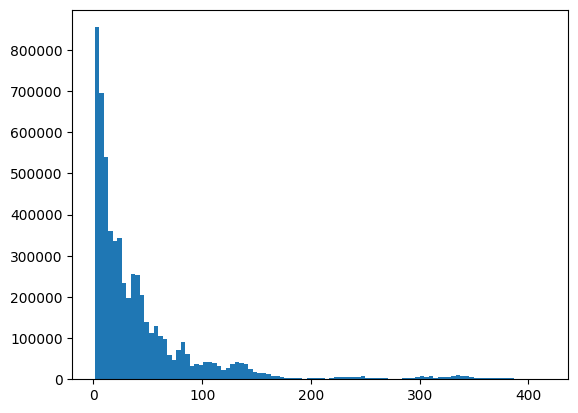